<h1><center><font color='midnightblue'> Bonus Assignment Of Hypothesis Testing:</font></center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
classroom_actions = pd.read_csv("classroom_actions.csv")
classroom_actions.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


<h2><font color='orangered'>Part 1:</font></h2>

<h2><center><font color='darkorange'>First we will clean the data from any errors:</font></center></h2>

<h2><center><font color='purple'>Error number 1;</font><font color='darkorange'>Checking if there is any null values:</font></center></h2>

In [3]:
classroom_actions.isnull().any()

timestamp     False
id            False
group         False
total_days    False
completed     False
dtype: bool

<h3><font color='limegreen'> There is no any null values.</font></h3>

<h2><center><font color='purple'>Error number 2;</font> <font color='darkorange'>Checking if there is any duplicated values:</font></center></h2>

In [4]:
classroom_actions.id.nunique()

3829

In [5]:
classroom_actions.id.shape[0]

3829

<h3><font color='limegreen'> There is no any duplicated values.</font></h3>

<h2><center><font color='darkorange'> Now the data is clean of any errors:</font></center></h2>

<h2><font color='orangered'>Part 2:</font></h2>

<h2><center><p><font color='blue'>Test that average completion rate for the group <font color='crimson'>experiment</font> is bigger than the average completion rate in
group <font color='crimson'>control</font>:<br><em><font color='crimson'>Alternative:</font> 
Avg(Experiment.completed==1)-Avg(control.completed==1)&gt;0</em><br><em><font color='crimson'>Null</font> 
Avg(Experiment.completed==1)-Avg(control.completed==1)&lt;=0</em></font></p></center></h2>

<h2><center><font color='blue'>Getting the average completion rate of the group <font color='crimson'>experiment</font>:</font></center></h2>

In [6]:
experiment = classroom_actions.query("group == 'experiment'")
experiment.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False
8,2015-08-10 21:03:33.719529,929620,experiment,90,False


In [7]:
experiment_average = experiment["completed"].mean()
print(f'The average completion rate of the group experiment is: {experiment_average}')

The average completion rate of the group experiment is: 0.3935334872979215


<h2><center><font color='blue'>Getting the average completion rate of the group <font color='crimson'>control</font>:</font></center></h2>

In [8]:
control = classroom_actions.query("group == 'control'")
control.head()

,timestamp,id,group,total_days,completed
1,2015-08-10 17:15:28.950975,690224,control,75,False
5,2015-08-10 19:58:07.004051,763661,control,55,False
6,2015-08-10 20:10:42.230941,634832,control,97,False
7,2015-08-10 20:29:33.099757,849686,control,97,False
10,2015-08-11 00:45:37.012714,286646,control,50,False


In [9]:
control_average = control["completed"].mean()
print(f'The average completion rate of the group control is: {control_average}')

The average completion rate of the group control is: 0.3719951923076923


<h2><center><font color='blue'>Computing the observed difference in <font color='crimson'>classroom actions</font>:</font></center></h2>

In [10]:
obs_diff = experiment_average - control_average
print(f'The observed difference in classroom actions is: {obs_diff}')

The observed difference in classroom actions is: 0.02153829499022919


<h2><center><font color='blue'>Creating <font color='crimson'>sampling distribution</font> of difference in average classroom actions:</font></center></h2>

In [11]:
alt_hyp = []
size = classroom_actions.shape[0]
for _ in range (10000) :
    a_sample = classroom_actions.sample(size , replace = True)
    experiment = a_sample.query("group == 'experiment'")
    experiment_average = experiment["completed"].mean()
    control = a_sample.query("group == 'control'")
    control_average = control["completed"].mean()
    alt_hyp.append(experiment_average - control_average)

<h2><center><font color='blue'>Putting the <font color='crimson'>sampling distribution</font> into array:</font></center></h2>

In [12]:
alt_hyp = np.array(alt_hyp)

<h2><center><font color='blue'>Plotting the <font color='crimson'>sampling distribution</font>:</font></center></h2>

(array([  11.,  159.,  676., 1755., 2718., 2617., 1462.,  490.,  101.,
          11.]),
 array([-0.03557018, -0.02388825, -0.01220633, -0.0005244 ,  0.01115752,
         0.02283945,  0.03452137,  0.0462033 ,  0.05788522,  0.06956715,
         0.08124907]),
 <a list of 10 Patch objects>)

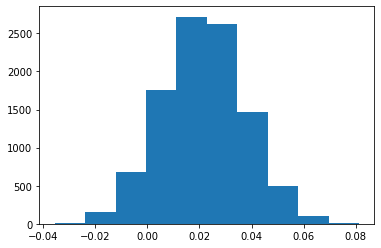

In [13]:
plt.hist(alt_hyp)

<h2><center><font color='blue'>Simulating the distribution under the <font color='crimson'>null hypothesis</font>:</font></center></h2>

In [14]:
null_hyp = np.random.normal(0, alt_hyp.std(), alt_hyp.size)

<h2><center><font color='blue'>Plotting the <font color='crimson'>null hypothesis</font><br>Plotting a line for <font color='crimson'>observed statistic</font>:</font></center></h2>

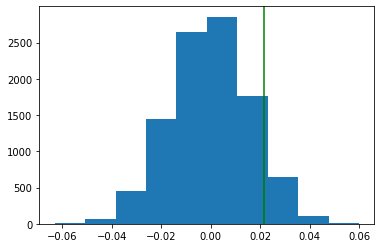

In [15]:
plt.hist(null_hyp)

plt.axvline(obs_diff , c='green')

<h2><center><font color='blue'> Computing the <font color='crimson'>p-value</font>:</font></center></h2>

In [16]:
p_value = (null_hyp > obs_diff).mean()
print(f'The p-value is: {p_value}')

The p-value is: 0.0894


<h3><font color='limegreen'>We will reject the null hypothesis.</font></h3>